In [1]:
!pip install pandas-profiling==2.7.1

In [2]:
import os, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import scipy.stats  as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# 1. Entendimiento del negocio y de los datos 




In [3]:
df = pd.read_excel("Datos_parcial2.xlsx", index_col ="ID")
df

COD_SAL  VIA    CANTI      PBK      PNK     FOBPES    FOBDOL  FLETES  \
ID                                                                           
9087      BOG    4   140.00  0.02660  0.02460   5.038243   1.67604  517.00   
3481      BOG    4   142.00  0.06101  0.05636   4.309442   1.43917   45.24   
9368      BOG    4     1.00  0.00140  0.00100   0.274905   0.09251    0.00   
21953     IPI    3     2.00  0.45793  0.39397  38.356037  12.72600  269.54   
14218     BUN    1  5328.00  5.91942  5.32800  17.028346   5.62038    0.00   
...       ...  ...      ...      ...      ...        ...       ...     ...   
17669     BUN    1   610.05  0.61005  0.61005   5.202518   1.72487    0.00   
19754     BUN    1    89.00  0.01431  0.01289   2.002604   0.66098    0.00   
2260      BOG    4     2.00  0.00061  0.00039   0.011849   0.00400    0.00   
22474     IPI    3    10.00  0.01674  0.01500   0.131346   0.04420    0.00   
18587     BUN    1    33.75  0.00397  0.00388   0.063958   0.02111    0.25   

       SEGURO  OTROSG          PAIS  
ID                                   
9087     0.00    0.00  PAISES BAJOS  
3481     1.09    0.00       ECUADOR  
9368      NaN    0.00        PANAMA  
21953     NaN   89.84       ECUADOR  
14218     NaN    0.00        BRASIL  
...       ...     ...           ...  
17669     NaN    0.00        PANAMA  
19754     NaN    0.00       BOLIVIA  
2260      NaN    0.00    COSTA RICA  
22474     NaN    0.00       ECUADOR  
18587     NaN    0.00          PERU  

[13926 rows x 11 columns]

In [4]:
pandas_profiling.ProfileReport(df)

## Describa el resultado del perfilamiento de datos e indique el tipo de cada variable.
Revisando el perfilamiento de datos se puede evidenciar que el 1.4% de las filas son duplicadas, dadas las variables considero que se deberían remover pues es bastante improbable que se presenten tales coincidencias dadas las unidades de las variables como Peso bruto y Peso neto de la mercancía, columnas como _OTROSG_ y _SEGURO_ cuentan con registros nulos que, de acuerdo al diccionario y la frecuencia de los valores presentes en estas variables puede deberse a valores no marcados como 0. Asimismo, se encontró que variables como _FLETES_ y las previamente mencionadas _SEGURO_ y _OTROSG_ cuentan con gran cantidad de valores 0 superior al 70%


In [5]:
for columna in df.columns:
  print(columna)
  print(df[columna].unique(), len(df[columna].unique()))

COD_SAL
['BOG' 'IPI' 'BUN' 'CTG' 'CLO' 'MDE' 'SMR' 'BAQ' 'RCH' 'BGA' 'PEI' 'TRB'
 'CUC' 'MAI' 'ADZ'] 15
VIA
[4 3 1 7] 4
CANTI
[140.   142.     1.   ... 104.1  610.05  33.75] 5096
PBK
[0.0266  0.06101 0.0014  ... 0.46237 0.61005 0.01431] 9250
PNK
[0.0246  0.05636 0.001   ... 0.30018 0.391   0.61005] 7459
FOBPES
[5.03824328 4.30944201 0.27490549 ... 0.01184856 0.13134604 0.06395802] 13266
FOBDOL
[1.67604 1.43917 0.09251 ... 1.72487 0.66098 0.02111] 11473
FLETES
[ 517.     45.24    0.   ...   14.3  1024.    129.99] 3044
SEGURO
[0.00000e+00 1.09000e+00         nan 2.79200e+01 5.90000e-01 3.70000e+00
 8.81000e+01 3.00000e-02 6.00000e-02 4.80000e-01 1.50000e-01 2.30000e+01
 1.80000e+00 3.17400e+01 8.16000e+00 4.60000e-01 2.74440e+02 3.00000e+01
 4.13300e+01 4.50000e-01 5.00000e+01 5.60000e-01 7.60000e-01 3.15000e+00
 9.56000e+00 1.53000e+00 8.44000e+00 1.40000e+01 2.94000e+00 1.42000e+00
 7.40000e-01 2.65000e+00 9.14600e+01 4.03000e+00 9.40000e-01 3.90000e-01
 7.00000e-02 1.12000e+00 7.71000

Vemos que para variables como _COD_SAL_ y _VIA_ hay menos valores que los posibles mencionados en el diccionario y que sin embargo son posibles. También vemos que para la variable PAIS hay más valores posibles que los mencionados en el diccionario por lo que es mejor removerlos pues no son esperados. También es posible ver que el tipo de la variable _CANTI_ no corresponde al esperado pues debería ser una variable discreta y además presenta valores ireales que serán especificados más adelante.

In [6]:
df.dtypes

COD_SAL     object
VIA          int64
CANTI      float64
PBK        float64
PNK        float64
FOBPES     float64
FOBDOL     float64
FLETES     float64
SEGURO     float64
OTROSG     float64
PAIS        object
dtype: object

## Describa el entendimiento que tiene del negocio a partir de los datos suministrados. 

Los datos están relacionados con exportaciones realizadas en Colombia en el mes de Diciembre en un año específico. 
En el dataset hay 9 variables numéricas y 3 categóricas que describen una exportación.
* ID	ID de la exportación
* COD_SAL Lugar de donde sale la mercancía.
* VIA Vía de transporte.
* CANTI Número de unidades del producto exportado
* PBK Peso bruto de la mercancía (En Kilos)
* PNK Peso neto de la mercancía (En Kilos)
* FOBDOL Valor total de la mercancía (en miles de dólares)
* FOBPES Valor total de la mercancía (en millones de pesos)
* FLETES Valor fletes de la mercancía (En pesos)
* SEGURO Valor asociado a seguros de la mercancía
* OTROSG Otros gastos de la mercancía
* PAIS País destino de la mercancía exportada

# 2. Análisis y propuestas accionables.

## Hipótesis de interés.
1. La ubicación del lugar de dónde sale la mercancía está relacionada con el país de destino, entre más adentro geográficamente se encuentre el lugar de salida, más cerca se encuentra el país de destino.
2. El peso bruto está relacionado de manera directa con el valor total de la mercancía en millones de pesos, entre más pesada sea la mercancía, más va a costar.
3. El valor de otros gastos de la mercancía está relacionado con la vía de transporte usada para la exportación, entre menos común sea mayor va a ser el valor de los otros gastos.
4. El número de unidades del producto exportado está relacionado con la ubicación del lugar de dónde sale la mercancía, entre más costera sea la ubicación del lugar de dónde sale la mercancía más unidades se van a exportar

### Hipótesis 1
La ubicación del lugar de dónde sale la mercancía está relacionada con el país de destino, entre más adentro geográficamente se encuentre el lugar de salida, más cerca se encuentra el país de destino.

Text(0.5, 1.0, 'Cantidad de exportaciones por país de destino y región de salida')

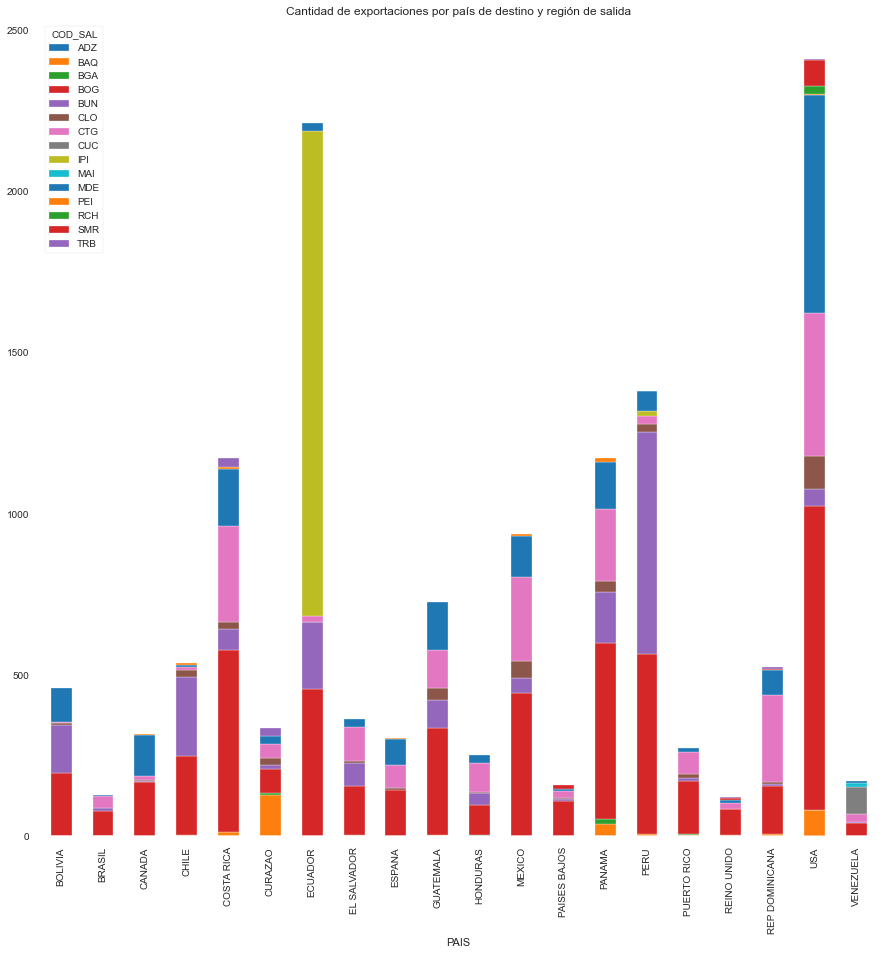

In [7]:
df2 = df.groupby(['PAIS', 'COD_SAL'])['PAIS'].count().unstack('COD_SAL').fillna(0)
ax = df2.plot(kind='bar', stacked=True,figsize=(15,15))
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
ax.set_title("Cantidad de exportaciones por país de destino y región de salida")

Podemos ver que hay regiones como CTG o BUN que participan activamente en algunas exportaciones mientras que en otras no lo que podría ayudarnos a dar una idea de la validez de la hipótesis

### Hipótesis 2
El peso bruto está relacionado de manera directa con el valor total de la mercancía en millones de pesos, entre más pesada sea la mercancía, más va a costar.

<AxesSubplot:xlabel='FOBPES', ylabel='PBK'>

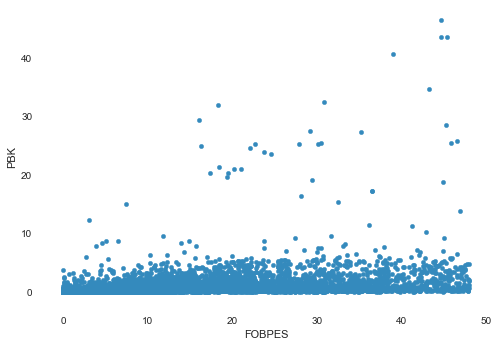

In [8]:
df.plot.scatter(x='FOBPES', y='PBK')

Acá podemos ver que hay una especie de relación lineal entre el peso bruto y el valor total de la mercancía en millones de pesos

### Hipótesis 3.
El valor de otros gastos de la mercancía está relacionado con la vía de transporte usada para la exportación, entre menos común sea mayor va a ser el valor de los otros gastos.


<AxesSubplot:xlabel='VIA', ylabel='OTROSG'>

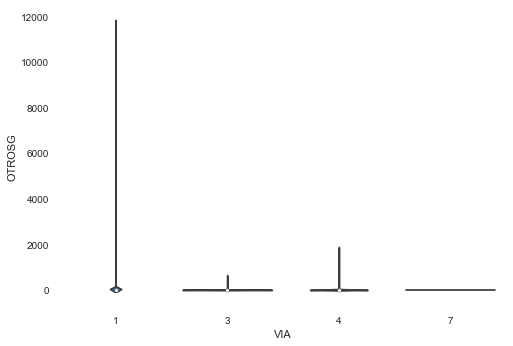

In [9]:
sns.violinplot("VIA","OTROSG",data=df)

### Hipótesis 4.
El número de unidades del producto exportado está relacionado con la ubicación del lugar de dónde sale la mercancía, entre más costera sea la ubicación del lugar de dónde sale la mercancía más unidades se van a exportar

Text(0, 0.5, 'CANTIDAD')

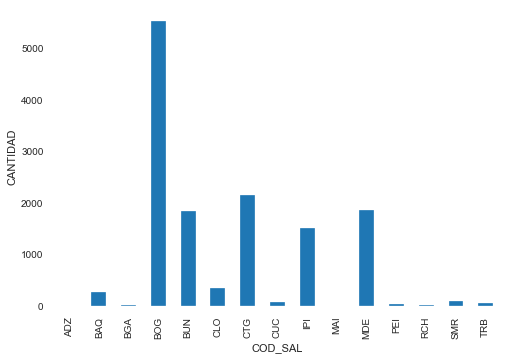

In [10]:
ax = df.groupby("COD_SAL")["CANTI"].count().plot(kind="bar")
ax.set_ylabel("CANTIDAD")

Acá podemos ver que hay algunas regiones de salida que tienen una gran cantidad de exportaciones y entre ellas hay presentes varias costeras como Cartagena.

## Problemas de calidad de los datos que puedan afectar los análisis propuestos en las hipótesis 

La cantidad de valores nulos mencionada previamente podría afectar. Sin embargo, dado el bajo porcentaje su impacto al eliminarlas sería leve por lo que es lo que haré, también sería conveniente validar con un experto en el negocio la razón de estos. Asimismo, los valores duplicados como se mencionó previamente no puede afectar notablemente los análisis propuestos en las hipótesis pues su porcentaje es poco y considero que a pesar de lo anterior y dadas las unidades de las variables las probabilidades de presencia de estas coincidencias son nulas por lo que es mejor eliminarlas. 
Todas las variables corresponden exactamente a la realidad planteada en el diciconario de datos, a excepción de las variables
* PAIS que cuenta con 4 registros fuera de los mencionados en el diccionario.
* PBK que cuenta con valores en 0
* CANTI que cuenta con valores decimales

## Ajustes sobre los datos

Inicialmente se eliminarán las filas que en la variable país contengan a alguno de los países no especificados en el diccionario

También se eliminarán las filas que contengan en la variable PBK el valor de 0 y que en canti cuenten con valores decimales y se cambiará el tipo a Int.


In [11]:
aRemov = ["BRASIL","HONDURAS","VENEZUELA","REINO UNIDO"] 
for a in aRemov:
  df = df[df.PAIS!=a]
print(df.PAIS.unique(),len(df.PAIS.unique()))

['PAISES BAJOS' 'ECUADOR' 'PANAMA' 'USA' 'MEXICO' 'EL SALVADOR'
 'COSTA RICA' 'CURAZAO' 'ESPANA' 'PERU' 'GUATEMALA' 'CHILE'
 'REP DOMINICANA' 'BOLIVIA' 'CANADA' 'PUERTO RICO'] 16


In [12]:
df = df[df["PBK"]>0]
df = df[df["CANTI"]%1==0]
df["CANTI"] = df["CANTI"].astype(int)

In [13]:
df = df.drop_duplicates()

## Validación de hipótesis planteadas

### Hipótesis 1
La ubicación del lugar de dónde sale la mercancía está relacionada con el país de destino, entre más adentro geográficamente se encuentre el lugar de salida, más cerca se encuentra el país de destino.

In [14]:
print(df["COD_SAL"].unique())

['BOG' 'IPI' 'BUN' 'CLO' 'MDE' 'CTG' 'SMR' 'BAQ' 'RCH' 'BGA' 'PEI' 'TRB']


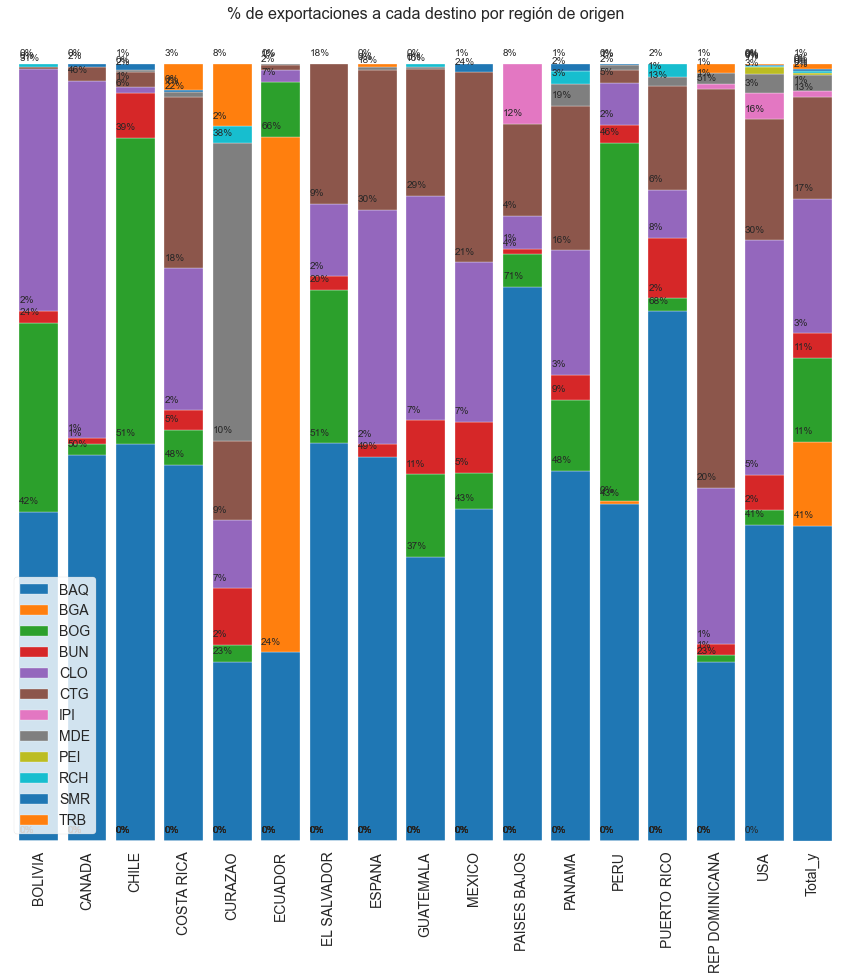

In [15]:
def freq_relativFil(col,df):
  Tabla = pd.crosstab(index=df[col],columns=df["COD_SAL"],margins=True)
  cols = list(Tabla.columns)
  cols[-1] = "Total_"+col
  Tabla.columns = cols
  idxs = list(Tabla.index)
  idxs[-1] = "Total_y"
  Tabla.index = idxs
  return Tabla.div(Tabla["Total_"+col], axis=0)

Tabla = freq_relativFil('PAIS',df)
Tabla

ax = (Tabla[df["COD_SAL"].unique()]).plot(kind='bar',figsize=(15,15),width = 0.8,edgecolor=None, stacked=True)
plt.legend(labels=Tabla.columns,fontsize= 14)
plt.title("% de exportaciones a cada destino por región de origen",fontsize= 16)

plt.xticks(fontsize=14, rotation=90)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

In [16]:
def contingencia(col,df):
  Tabla = pd.crosstab(index=df[col],columns=df["COD_SAL"])
  return Tabla

def chiquad(Tabla, prob = 0.95):
  estadistico, p_value, grados_libertad, freq_esperadas = chi2_contingency(Tabla)
  print(f"El estadístico de prueba es {estadistico}, el p_value es {p_value}, los grados de libertad {grados_libertad} y las frecuencias esperadas son:\n {freq_esperadas}")
  print("Interpretando p_value con probabilidad del {}%".format(prob*100))
  alpha = 1.0 - prob
  if p_value <= alpha:
    print('Dependientes (Se rechaza H0)')
  else:
    print('No son dependientes (No se puede rechazar H0)')
  print("Interpretando estadístico de prueba con probabilidad del {0}% y {1} grados de libertad".format(prob*100,grados_libertad))
  # interpret test-statistic
  critical = chi2.ppf(prob, grados_libertad)
  if abs(estadistico) >= critical:
    print('Dependientes (Se rechaza H0)')
  else:
    print('No son dependientes (No se puede rechazar H0)')
Tabla = contingencia("PAIS",df)
Tabla

COD_SAL         BAQ  BGA  BOG  BUN  CLO  CTG   IPI  MDE  PEI  RCH  SMR  TRB
PAIS                                                                       
BOLIVIA           0    1  136   78    5    1     0  100    0    0    0    0
CANADA            0    0  137    4    2    5     0  127    1    0    0    0
CHILE             1    0  189  146   21    7     0    3    3    0    0    0
COSTA RICA        5    0  429   40   22  196     0  162    3    0    0   29
CURAZAO         105    6   63    6   20   28     0   24    0    0    0   22
ECUADOR           1    0  371  108    0   10  1015   25    0    0    0    0
EL SALVADOR       0    0   88   34    3   31     0   16    0    0    0    0
ESPANA            1    0  121    0    4   44     0   74    0    0    0    1
GUATEMALA         1    2  168   49   32   75     0  133    0    0    0    0
MEXICO            0    0  241   26   37  138     0  116    6    0    0    0
PAISES BAJOS      0    0  102    6    1   17     0    6    0    0   11    0
PANAMA           25   14  413   79   28  161     0  139    8    0    0    0
PERU              5    0  373  397   20   15     4   46    1    0    0    0
PUERTO RICO       2    3  122    3   14   24     0   11    0    0    0    0
REP DOMINICANA    5    0   80    3    5  179     0   70    0    0    2    4
USA              48    2  777   37   87  298     0  576    2   18   64    2

In [17]:
chiquad(Tabla)

El estadístico de prueba es 11727.62911907899, el p_value es 0.0, los grados de libertad 165 y las frecuencias esperadas son:
 [[6.79058148e+00 9.55458701e-01 1.30010630e+02 3.46695014e+01
  1.02711810e+01 4.19378123e+01 3.47718720e+01 5.55530988e+01
  8.18964601e-01 6.14223451e-01 2.62751143e+00 1.97916445e+00]
 [5.83863081e+00 8.21515892e-01 1.11784841e+02 2.98092910e+01
  8.83129584e+00 3.60586797e+01 2.98973105e+01 4.77652812e+01
  7.04156479e-01 5.28117359e-01 2.25916870e+00 1.70171149e+00]
 [7.82714999e+00 1.10130754e+00 1.49856490e+02 3.99617306e+01
  1.18390560e+01 4.83395344e+01 4.00797279e+01 6.40331668e+01
  9.43977889e-01 7.07983417e-01 3.02859573e+00 2.28127990e+00]
 [1.87428511e+01 2.63718507e+00 3.58845541e+02 9.56921441e+01
  2.83497396e+01 1.15753588e+02 9.59746997e+01 1.53333475e+02
  2.26044435e+00 1.69533326e+00 7.25225896e+00 5.46274051e+00]
 [5.79632189e+00 8.15562879e-01 1.10974806e+02 2.95932816e+01
  8.76730095e+00 3.57973849e+01 2.96806633e+01 4.74191559e+01
 

Las variables COD_SAL y PAIS están relacionadas.



## Hipótesis 2
El peso bruto está relacionado de manera directa con el valor total de la mercancía en millones de pesos, entre más pesada sea la mercancía, más va a costar.

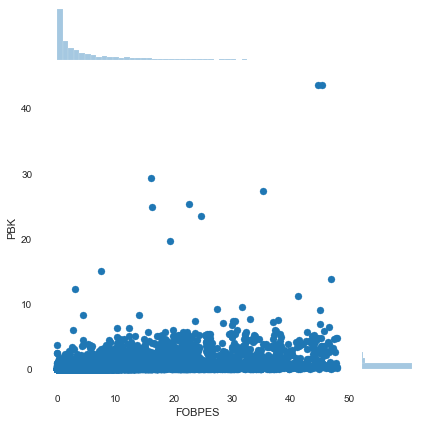

In [18]:
sns.jointplot("FOBPES","PBK",data=df)

In [19]:
df[["FOBPES","PBK"]].corr(method="pearson")

FOBPES       PBK
FOBPES  1.000000  0.386823
PBK     0.386823  1.000000

In [20]:
df[["FOBPES","PBK"]].corr(method="spearman")

FOBPES       PBK
FOBPES  1.000000  0.728765
PBK     0.728765  1.000000

Dado que las variables no están distribuidas normalmente la correlación de Pearson no es la adecuada para determinar qué tan correlacionadas están. Sin embargo está la correlación de Spearman que sirve para determinar y nos indica que hay un 72.8% de correlación entre estas variables

# Impacto en la ley de protección de datos
De acuerdo a los fines del DANE no hay restricciones legales con los datos pues no presentan información sensible y se encuentran a disposición del público para su uso. Sin embargo, hay que ser responsable con los resultados que se obtengan y su publicación.